<a href="https://colab.research.google.com/github/dajuctech/Applied-AI-Course/blob/main/DL/Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Diagnosis with NN

This notebook contains practical examples and exercises for Applied AI-DL and Optimisation.

*Created by Hansi Hettiarachchi*



**Detailed Explanation and Step-by-Step Breakdown of the Code**

This Python notebook builds and optimizes a Neural Network (NN) for breast cancer diagnosis using the Breast Cancer Wisconsin Dataset. It involves data preprocessing, feature extraction, training deep learning models, applying optimization techniques, and evaluating performance.

This tutorial will guide you through the process of building and optimising neural network models targeting a real-world problem.

**Step 1: Importing Libraries**

In [1]:
# import libraries
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn import metrics



**Why These Libraries?**

* pandas (pd): Handles data loading, manipulation, and transformation.
* seaborn (sns): Provides visualization tools for dataset exploration.
* scikit-learn (sklearn):
    * LabelEncoder: Converts categorical labels (M/B) to numeric (1/0).
    * train_test_split: Splits the dataset into training and validation sets.
    * metrics: Computes model evaluation metrics like accuracy and classification reports.
* TensorFlow (tensorflow.keras):
    * Used to define, compile, and train Deep Learning models.

**Step 2: Setting Random Seeds for Reproducibility**

In [2]:
# set random seeds to get reproducible results
import os
seed = 100
os.environ['PYTHONHASHSEED']=str(seed)
keras.utils.set_random_seed(seed) # set all random seeds for the program (Python, NumPy, and TensorFlow)

**Why Set Random Seeds?**

* Neural Networks use random initialization of weights.
* Without fixing the seed, results will vary across runs.
* Setting a seed ensures consistent and reproducible model training results.

**Random seeds**

It is important to set random seeds to fixed values to generate reproducible results.

If the random seeds are not fixed, the initial weights of the neural network will assign randomly, resulting in different models (in terms of weights).

More details on generating reproducible results in Keras are available in the below links.
* [How can I obtain reproducible results using Keras during development?](https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development)
* [tf.keras.utils.set_random_seed](https://www.tensorflow.org/api_docs/python/tf/keras/utils/set_random_seed)

## Understanding the problem and data set

I use [Breast Cancer Wisconsin (Diagnostic) Data Set
](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) for this tutorial.

Features available with this data set are computed from a digitised image of a fine needle aspirate (FNA) of a breast mass. They describe the characteristics of the cell nuclei present in the image.<br>
The diagnosed labels are 'M' and 'B', which correspond to malignant and benign.  

The targeted problem is to predict the tumour type given the features computed from digitised images. Let's train a simple neural network to make this prediction.

### Load and analyse the data set

In [3]:
# load the data set
# As the parameter, the file path should be provided. Additionally, GitHub URL can also be provided as follows.
df = pd.read_csv('https://raw.githubusercontent.com/HHansi/Applied-AI-Course/main/DL/data/cancer_data.csv')

# summarise the details
print(f'Number of entries: {len(df)}')
df.head()

Number of entries: 569


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Axes: xlabel='diagnosis', ylabel='count'>

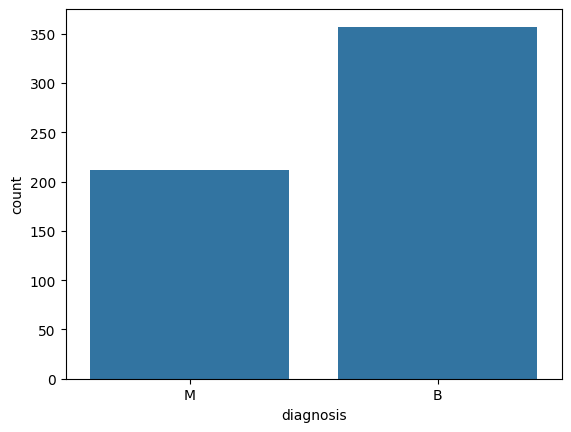

In [6]:
# Summarise class details
sns.countplot(x=df['diagnosis'])

**Dataset Details**
* This dataset contains breast tissue biopsy data with features extracted from images.
* diagnosis (Target Variable):
    * M (Malignant) → 1 (Cancerous)
    * B (Benign) → 0 (Non-cancerous)
* Why Check Class Distribution?
  * To determine data balance (e.g., Are there more benign than malignant cases?).
  * Imbalanced datasets affect model performance.

**Step 4: Preparing Features and Labels**

## Extracting labels and features

In [7]:
# extract labels
y = df['diagnosis']

print(y.value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64


In [8]:
# remove unnecessary columns
X = df.drop(['id', 'diagnosis'], axis=1)

print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Why Do This?**
* Extract y (target variable diagnosis).
* Drop unnecessary columns:
    * id: A unique identifier, irrelevant for training.
    * diagnosis: Already stored in y.

**Step 5: Encoding Labels**

Since we have characters ('M' and 'B') as labels, they need to be converted into numeric values. <br>
This can be easily done using a LabelEncoder

In [9]:
# create LabelEncoder for labels
le = LabelEncoder()
le.fit(y)

LabelEncoder()

In [10]:
# Convert labels into numeric values
y = le.transform(y)

y = pd.Series(y)
print(y.value_counts())

0    357
1    212
Name: count, dtype: int64


**Why Encode Labels?**
* ML/DL models require numeric values, not text.
* Converts:
    * M → 1
    * B → 0

**Step 6: Building Model 1 (M1)**

## M1

As the initial model, let's think about a simple model using 8 features and 2 hidden layers.

![](https://github.com/HHansi/Applied-AI-Course/blob/main/DL/images/Simple_neural_network.png?raw=true)


Let's select the first 8 features for this model.

In [11]:
X1 = X.iloc[:, 0:8]
X1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430


**Why Select 8 Features?**
* This model (M1) is a simpler version using only 8 features.
* Helps test if a small feature set is enough.

**Step 7: Splitting Data for Training**

### Split Data

In [12]:
# split data to train and validation sets
X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y, test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train1)}')
print(f'validation data set size: {len(X_val1)}')

training data set size: 398
validation data set size: 171


**Why Split Data?**
* Training Set (70%): Model learns from this data.
* Validation Set (30%): Evaluates how well the model generalizes.


**Step 8: Defining the First Neural Network Model**

### Build Model

A [Sequential](https://keras.io/guides/sequential_model/) model is appropriate for a plain stack of layers.<br>
The layers of network can be defined using [Dense](https://keras.io/api/layers/core_layers/dense/) layers (regular densely-connected NN layers)

More details about model training using Keras can be found in the documentation: [Model training APIs](https://keras.io/api/models/model_training_apis/#compile-method).

In [13]:
# define the keras model
model1 = keras.Sequential()
model1.add(layers.Dense(12, input_dim=8, activation='relu'))
model1.add(layers.Dense(8, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

**Model Architecture**
* Input Layer: 8 features.
* Hidden Layers:
    * 12 neurons (ReLU activation).
    * 8 neurons (ReLU activation).
* Output Layer:
    * 1 neuron (Sigmoid activation) to classify Malignant (1) or Benign (0).

**Step 9: Compiling and Training the Model**

In [14]:
# compile the keras model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# train model
model1.fit(X_train1, y_train1, batch_size=50, epochs=60, validation_data=(X_val1, y_val1))

Epoch 1/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.6212 - loss: 109.9422 - val_accuracy: 0.5965 - val_loss: 104.4988
Epoch 2/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6212 - loss: 92.4394 - val_accuracy: 0.5965 - val_loss: 86.3711
Epoch 3/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6212 - loss: 75.9095 - val_accuracy: 0.5965 - val_loss: 69.2066
Epoch 4/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6212 - loss: 60.2467 - val_accuracy: 0.5965 - val_loss: 52.8830
Epoch 5/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6212 - loss: 45.3824 - val_accuracy: 0.5965 - val_loss: 38.6411
Epoch 6/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6212 - loss: 33.2590 - val_accuracy: 0.5965 - val_loss: 29.0463
Epoch 7/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6212 - loss: 25.0685 - val_accuracy: 0.5965 - val_loss: 21.2369
Epoch 8/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6212 - loss: 17.8946 - val_accuracy: 0.5965 - 

**Why These Parameters?**
* Loss Function: binary_crossentropy (suitable for binary classification).
* Optimizer: adam (adjusts learning rates dynamically).
* Batch Size: 50 (controls the number of samples per update).
* Epochs: 60 (controls the number of training cycles).

**Step 10: Model Evaluation**

### Validate Model

Validation accuracy is measured in the previous step too. But let's see how to do it separately.

In [16]:
# get model predictions
y_pred1 = model1.predict(X_val1)
print(y_pred1[:10])

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[[0.55164003]
 [0.35311157]
 [0.55164003]
 [0.18562521]
 [0.18337071]
 [0.18224233]
 [0.55164003]
 [0.55164003]
 [0.26172072]
 [0.17312373]]


In [17]:
# convert to categorical predictions
y_pred_categorical1 = [1 if pred > 0.5 else 0 for pred in y_pred1]
print(y_pred_categorical1[:10])

[1, 0, 1, 0, 0, 0, 1, 1, 0, 0]


In [18]:
# measure accuracy
accuracy = metrics.accuracy_score(y_val1, y_pred_categorical1)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8070175438596491


**What This Does**
* Converts raw probability predictions into binary class predictions (0/1).
* Computes accuracy.

### Test Predictions

In [19]:
df_test = pd.read_csv('https://raw.githubusercontent.com/HHansi/Applied-AI-Course/2022/DL/data/cancer_data_test.csv')

# summarise the details
print(f'Number of entries: {len(df_test)}')

X_test = df_test.drop(['id'], axis=1)
print(X_test.info())

Number of entries: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              6 non-null      float64
 1   texture_mean             6 non-null      float64
 2   perimeter_mean           6 non-null      float64
 3   area_mean                6 non-null      float64
 4   smoothness_mean          6 non-null      float64
 5   compactness_mean         6 non-null      float64
 6   concavity_mean           6 non-null      float64
 7   concave points_mean      6 non-null      float64
 8   symmetry_mean            6 non-null      float64
 9   fractal_dimension_mean   6 non-null      float64
 10  radius_se                6 non-null      float64
 11  texture_se               6 non-null      float64
 12  perimeter_se             6 non-null      float64
 13  area_se                  6 non-null      float64
 14  smoothnes

In [20]:
X_test1 = X_test.iloc[:, 0:8]
X_test1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530
1,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917
2,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.073400
3,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.021800
4,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.182300


In [21]:
test_pred = model1.predict(X_test1)
print(test_pred)

test_pred_categorical = [1 if pred > 0.5 else 0 for pred in test_pred]
print(test_pred_categorical)

test_pred_encoded = le.inverse_transform(test_pred_categorical)
print(test_pred_encoded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[0.18899369]
 [0.14471616]
 [0.23323432]
 [0.15660419]
 [0.55164003]
 [0.13209182]]
[0, 0, 0, 0, 1, 0]
['B' 'B' 'B' 'B' 'M' 'B']


## Clear Keras Session

Keras manages a global state, which it uses to implement the Functional model-building API and to uniquify autogenerated layer names. If you are creating many models in one session, this global state will consume an increasing amount of memory over time.

Calling [clear_session()](https://www.tensorflow.org/api_docs/python/tf/keras/backend/clear_session) releases the global state: this helps avoid clutter from old models and layers, especially when memory is limited.

Once the session is cleared, you need to make sure to set back any important states you require (like random state).


In [22]:
# clear session
keras.backend.clear_session()

# set random seed
keras.utils.set_random_seed(seed) # set all random seeds for the program (Python, NumPy, and TensorFlow)

**Step 11: Building a More Complex Model (M2)**

## M2

Let's build a more complex model with 30 features and more neurons.

In [23]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Split Data

In [24]:
# split data to train and validation sets
X_train2, X_val2, y_train2, y_val2 = train_test_split(X, y, test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train2)}')
print(f'validation data set size: {len(X_val2)}')

training data set size: 398
validation data set size: 171


### Build Model

In [25]:
# define the keras model
model2 = keras.Sequential()
model2.add(layers.Dense(64, input_dim=30, activation='relu'))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# compile the keras model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
model2.fit(X_train2, y_train2, batch_size=50, epochs=60, validation_data=(X_val2, y_val2))

Epoch 1/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.3833 - loss: 53.5180 - val_accuracy: 0.5965 - val_loss: 13.2729
Epoch 2/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6300 - loss: 15.1962 - val_accuracy: 0.4678 - val_loss: 2.3658
Epoch 3/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3878 - loss: 5.8810 - val_accuracy: 0.8070 - val_loss: 0.5711
Epoch 4/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7587 - loss: 1.9026 - val_accuracy: 0.7602 - val_loss: 0.9622
Epoch 5/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6924 - loss: 1.3860 - val_accuracy: 0.8713 - val_loss: 0.6711
Epoch 6/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8532 - loss: 0.9489 - val_accuracy: 0.9240 - val_loss: 0.3202
Epoch 7/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8868 - loss: 0.5764 - val_accuracy: 0.9357 - val_loss: 0.3347
Epoch 8/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9135 - loss: 0.5087 - val_accuracy: 0.9357 - val_loss: 0.31

**Key Differences from M1**

* Uses all 30 features (vs. 8 in M1).
* More neurons (64, 32) for improved learning

### Test Predictions

In [27]:
df_test = pd.read_csv('https://raw.githubusercontent.com/HHansi/Applied-AI-Course/2022/DL/data/cancer_data_test.csv')

# summarise the details
print(f'Number of entries: {len(df_test)}')

X_test = df_test.drop(['id'], axis=1)
print(X_test.info())

Number of entries: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              6 non-null      float64
 1   texture_mean             6 non-null      float64
 2   perimeter_mean           6 non-null      float64
 3   area_mean                6 non-null      float64
 4   smoothness_mean          6 non-null      float64
 5   compactness_mean         6 non-null      float64
 6   concavity_mean           6 non-null      float64
 7   concave points_mean      6 non-null      float64
 8   symmetry_mean            6 non-null      float64
 9   fractal_dimension_mean   6 non-null      float64
 10  radius_se                6 non-null      float64
 11  texture_se               6 non-null      float64
 12  perimeter_se             6 non-null      float64
 13  area_se                  6 non-null      float64
 14  smoothnes

In [28]:
test_pred = model2.predict(X_test)
print(test_pred)

test_pred_categorical = [1 if pred > 0.5 else 0 for pred in test_pred]
print(test_pred_categorical)

test_pred_encoded = le.inverse_transform(test_pred_categorical)
print(test_pred_encoded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[[0.550927  ]
 [0.00325228]
 [0.64696974]
 [0.00225388]
 [1.        ]
 [0.18094957]]
[1, 0, 1, 0, 1, 0]
['M' 'B' 'M' 'B' 'M' 'B']


**Exercise**

1. What is the best validation loss and validation accuracy of *model2* obtained during the above training process?
2. Is the final model obtained as *model2* the best model we can build?

**Step 12: Early Stopping to Prevent Overfitting**

## Early Stopping

[Early stopping](https://keras.io/api/callbacks/early_stopping/) stops training when a monitored metric has stopped improving.



In [29]:
# clear session
keras.backend.clear_session()

# set random seed
keras.utils.set_random_seed(seed) # set all random seeds for the program (Python, NumPy, and TensorFlow)

In [30]:
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

# define the keras model
model2_1 = keras.Sequential()
model2_1.add(layers.Dense(64, input_dim=30, activation='relu'))
model2_1.add(layers.Dense(32, activation='relu'))
model2_1.add(layers.Dense(1, activation='sigmoid'))

model2_1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

**Why Early Stopping?**
* Stops training if validation accuracy does not improve for 3 epochs.
* Prevents overfitting.

**Step 13: Training Model 2 with Early Stopping**

In [ ]:
# compile the keras model
model2_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model with early stopping
model2_1.fit(X_train2, y_train2, batch_size=50, epochs=60, validation_data=(X_val2, y_val2), callbacks=[callback])

Epoch 1/60
8/8 [==============================] - 1s 31ms/step - loss: 38.1612 - accuracy: 0.3794 - val_loss: 13.2732 - val_accuracy: 0.5965
Epoch 2/60
8/8 [==============================] - 0s 9ms/step - loss: 15.0899 - accuracy: 0.6508 - val_loss: 2.1567 - val_accuracy: 0.4795
Epoch 3/60
8/8 [==============================] - 0s 8ms/step - loss: 5.9466 - accuracy: 0.4020 - val_loss: 0.5390 - val_accuracy: 0.8363
Epoch 4/60
8/8 [==============================] - 0s 9ms/step - loss: 2.3556 - accuracy: 0.7538 - val_loss: 0.7756 - val_accuracy: 0.8012
Epoch 5/60
8/8 [==============================] - 0s 10ms/step - loss: 1.4293 - accuracy: 0.7035 - val_loss: 0.7553 - val_accuracy: 0.8596
Epoch 6/60
8/8 [==============================] - 0s 8ms/step - loss: 0.8559 - accuracy: 0.8568 - val_loss: 0.3236 - val_accuracy: 0.9123
Epoch 7/60
8/8 [==============================] - 0s 9ms/step - loss: 0.5482 - accuracy: 0.8668 - val_loss: 0.3588 - val_accuracy: 0.9415
Epoch 8/60
8/8 [=============

**Why This is Important**
* The model stops training early when accuracy stagnates.

**Exercise**

1. What is the validation accuracy of *model2_1* build above? <br>
  **Hint:** You can check your answer by calculating the validation accuracy separately using the approach discussed under [M1>Validate Model](https://colab.research.google.com/drive/1uRq2uAsuT4O5dn-08o4-kUZds1cXfq0o?authuser=1#scrollTo=MCJxLR9HTpQI).
2. Is it the best value achived during the training process?



### Early Stopping with More Parameters

In [31]:
# clear session
keras.backend.clear_session()

# set random seed
keras.utils.set_random_seed(seed) # set all random seeds for the program (Python, NumPy, and TensorFlow)

In [32]:
callback2 = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# define the keras model
model2_2 = keras.Sequential()
model2_2.add(layers.Dense(64, input_dim=30, activation='relu'))
model2_2.add(layers.Dense(32, activation='relu'))
model2_2.add(layers.Dense(1, activation='sigmoid'))

model2_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# compile the keras model
model2_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
model2_2.fit(X_train2, y_train2, batch_size=50, epochs=60, validation_data=(X_val2, y_val2), callbacks=[callback2])

Epoch 1/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.3833 - loss: 53.5180 - val_accuracy: 0.5965 - val_loss: 13.2729
Epoch 2/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6300 - loss: 15.1962 - val_accuracy: 0.4678 - val_loss: 2.3658
Epoch 3/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3878 - loss: 5.8810 - val_accuracy: 0.8070 - val_loss: 0.5711
Epoch 4/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7587 - loss: 1.9026 - val_accuracy: 0.7602 - val_loss: 0.9622
Epoch 5/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6924 - loss: 1.3860 - val_accuracy: 0.8713 - val_loss: 0.6711
Epoch 6/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8532 - loss: 0.9489 - val_accuracy: 0.9240 - val_loss: 0.3202
Epoch 7/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8868 - loss: 0.5764 - val_accuracy: 0.9357 - val_loss: 0.3347
Epoch 8/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9135 - loss: 0.5087 - val_accuracy: 0.9357 - val_loss: 0.31

**Exercise**

1. What is the validation accuracy of *model2_2* build above? <br>
  **Hint:** You can check your answer by calculating the validation accuracy separately using the approach discussed under [M1>Validate Model](https://colab.research.google.com/drive/1uRq2uAsuT4O5dn-08o4-kUZds1cXfq0o?authuser=1#scrollTo=MCJxLR9HTpQI).
2. Is it the best value achived during the training process?

Discuss the following in small groups:
1. Which would be the best model among *model2_1* and *model2_2*?
2. What monitor metrics can be used with early stopping, and which would be the best?
3. How a value for patience can be selected, and what is its impact?
4. What are the advantages and disadvantages of early stopping?

**Final Takeaways**
* Early Stopping is crucial for preventing overfitting.
* More features & neurons improve accuracy but require regularization.
* Hyperparameter tuning can further optimize performance.